In [ ]:
RESEARCH_WORK_PATH = "/content/drive/MyDrive/Colab Notebooks/BachelorResearch/"

In [ ]:
import shutil
import os


data_dir = "/content/datas/"
if os.path.exists(data_dir):
  shutil.rmtree(data_dir)
for dirs in os.listdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/5s_0.5shift/wav/"):
  if "Q" in dirs:
    shutil.copytree(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/5s_0.5shift/wav/" + dirs, data_dir + dirs)


for q in "Q1 Q2 Q3 Q4".split(" "):
  d = data_dir + q + "/"
  print(q, sum(os.path.isfile(os.path.join(d, name)) for name in os.listdir(d)))

Q1 9200
Q2 9200
Q3 9200
Q4 9200


In [ ]:
import librosa
import numpy as np
from tqdm import tqdm

tempograms = [[], [], [], []]


for q in "Q1 Q2 Q3 Q4".split(" "):
  d = data_dir + q + "/"
  q = int(q[1])-1
  for a in tqdm(os.listdir(d)):
    audio_path = os.path.join(d, a)
    audio, sr = librosa.load(audio_path)
    tempograms[q].append(np.mean(librosa.feature.tempogram(audio, sr=sr)))



100%|██████████| 9200/9200 [10:10<00:00, 15.08it/s]


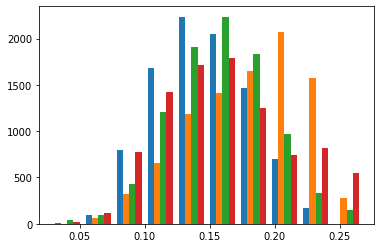

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         from matplotlib import pyplot as plt

plt.hist(tempograms, label="Q1 Q2 Q3 Q4".split(" "))
plt.show()

In [ ]:
import librosa
import numpy as np
from tqdm import tqdm

tempos = [[], [], [], []]


for q in "Q1 Q2 Q3 Q4".split(" "):
  d = data_dir + q + "/"
  q = int(q[1])-1
  for a in tqdm(os.listdir(d)):
    audio_path = os.path.join(d, a)
    audio, sr = librosa.load(audio_path)
    tempos[q].append(librosa.beat.tempo(audio, sr))



100%|██████████| 9200/9200 [07:38<00:00, 20.08it/s]


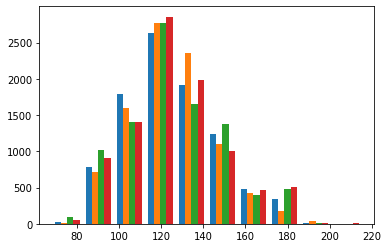

In [ ]:
from matplotlib import pyplot as plt
tempos = np.array(tempos)
tempos = np.squeeze(tempos)
tempos = tempos.transpose(1,0)

plt.hist(tempos, label="Q1 Q2 Q3 Q4".split(" "))
plt.show()